<Font color = 'BLUE'><h1>AIML Assessment for A.P. Moller Maersk <br>
<h3>By - Kaustubh Raykar <br>
PRN - 21070126048


<FONT COLOR = 'PURPLE '><H2>Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from keras.layers import Dense
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from IPython.display import display
from keras.models import Sequential
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

<FONT COLOR = 'PURPLE '><H2>Importing the Dataset

In [3]:
df = pd.read_excel("D:\AP\Training Dataset.xlsx")

<FONT COLOR = 'PURPLE '><H2>Data Preprocessing

In [4]:
df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.158
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.281
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.456
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.220
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.763


In [5]:
df.tail()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
550171,NTM2,X1,A5,DIRECT,Large,Powder,2020-07-01,136.469
550172,NTM3,X1,A14,DIRECT,Large,Liquid,2020-10-01,72.559
550173,NTM2,X1,A5,DIRECT,Small,Powder,2021-03-01,147.639
550174,NTM2,X1,A7,DIRECT,Small,Powder,2021-02-01,150.044
550175,NTM1,X1,A3,DIRECT,Small,Powder,2020-11-01,139.421


In [6]:
# Print the column names of the data
print(df.columns)

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Month of Sourcing', 'Sourcing Cost'],
      dtype='object')


In [7]:
# Extracting individual components
df['Year'] = df['Month of Sourcing'].dt.year
df['Month'] = df['Month of Sourcing'].dt.month

# Dropping the 'Month of Sourcing' column
df = df.drop(columns=['Month of Sourcing'])


In [8]:
# Printing the column names of the data
print(df.columns)

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Sourcing Cost', 'Year', 'Month'],
      dtype='object')


In [9]:
# Checking the shape of df
df.shape

(550176, 9)

In [10]:
# Checking the descriptive information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ProductType       550176 non-null  object 
 1   Manufacturer      550176 non-null  object 
 2   Area Code         550176 non-null  object 
 3   Sourcing Channel  550176 non-null  object 
 4   Product Size      550176 non-null  object 
 5   Product Type      550176 non-null  object 
 6   Sourcing Cost     550176 non-null  float64
 7   Year              550176 non-null  int32  
 8   Month             550176 non-null  int32  
dtypes: float64(1), int32(2), object(6)
memory usage: 33.6+ MB


In [11]:
#checking the data description
df.describe()

,Sourcing Cost,Year,Month
count,550176.000000,550176.000000,550176.000000
mean,108.816793,2020.479227,6.499642
std,104.390097,0.499569,3.683804
min,-196.070000,2020.000000,1.000000
25%,57.000000,2020.000000,3.000000
50%,132.000000,2020.000000,7.000000
75%,146.147000,2021.000000,10.000000
max,32632.500000,2021.000000,12.000000


In [12]:
#Check for null values
df.isnull().sum()

ProductType         0
Manufacturer        0
Area Code           0
Sourcing Channel    0
Product Size        0
Product Type        0
Sourcing Cost       0
Year                0
Month               0
dtype: int64

In [13]:
df.dtypes

ProductType          object
Manufacturer         object
Area Code            object
Sourcing Channel     object
Product Size         object
Product Type         object
Sourcing Cost       float64
Year                  int32
Month                 int32
dtype: object

<FONT COLOR = 'PURPLE '><H2>Exploratory Data Analysis

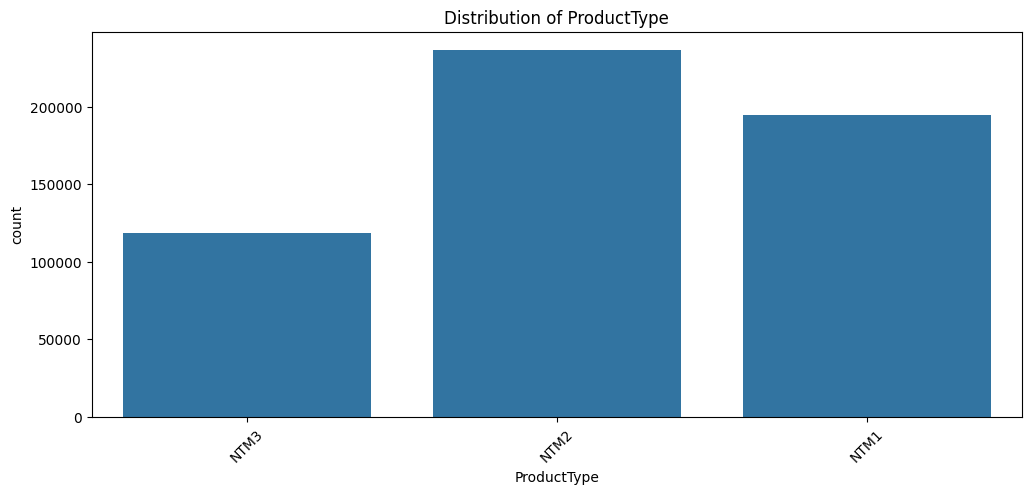

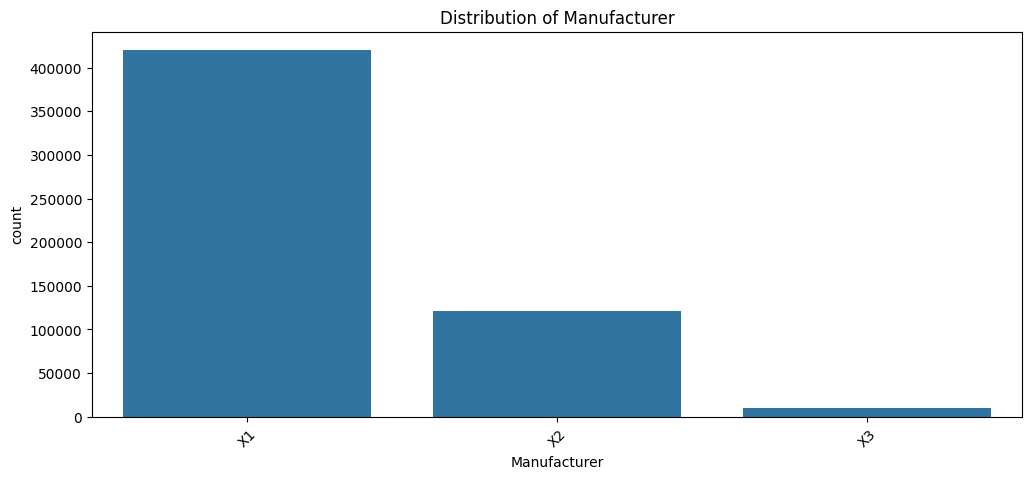

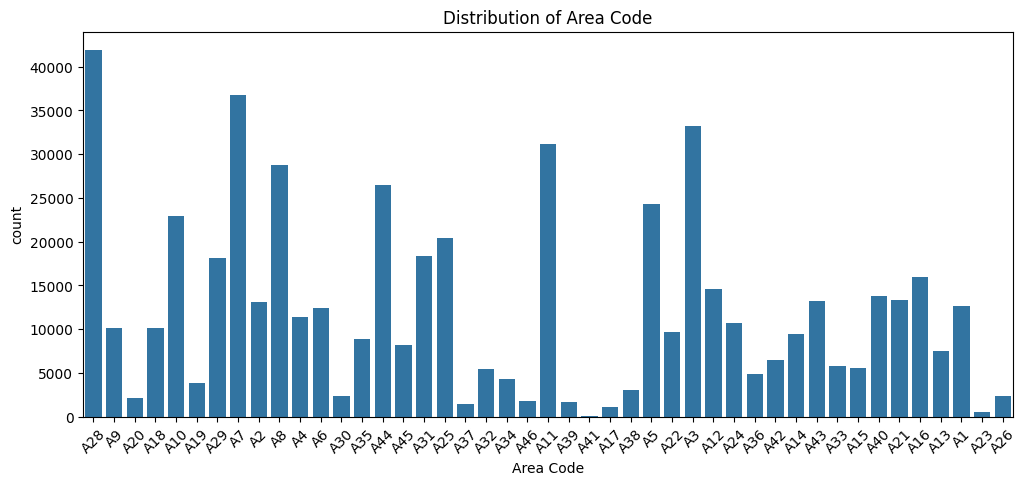

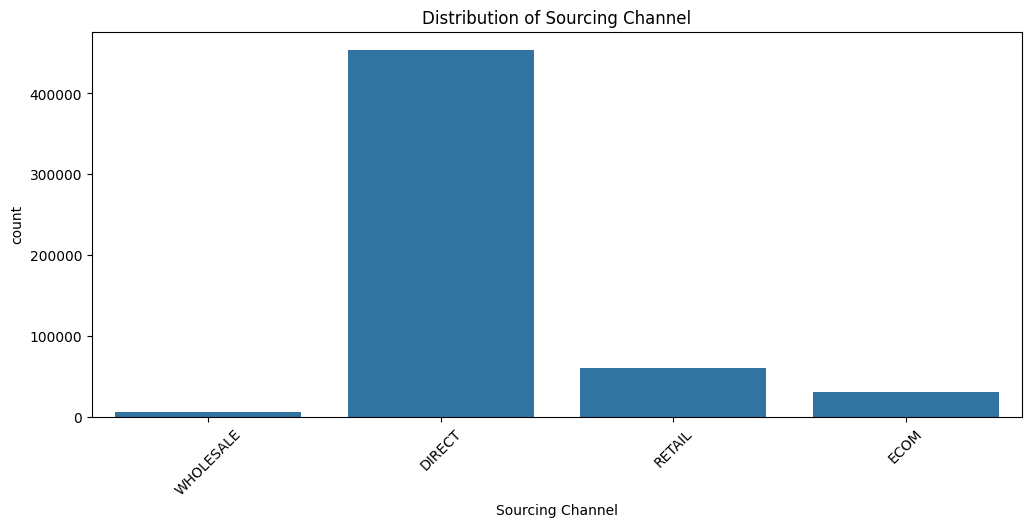

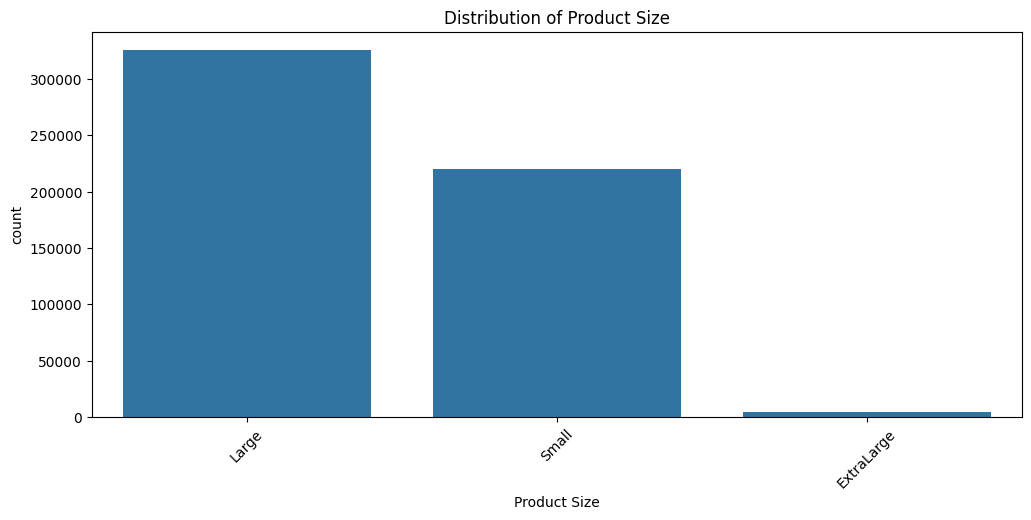

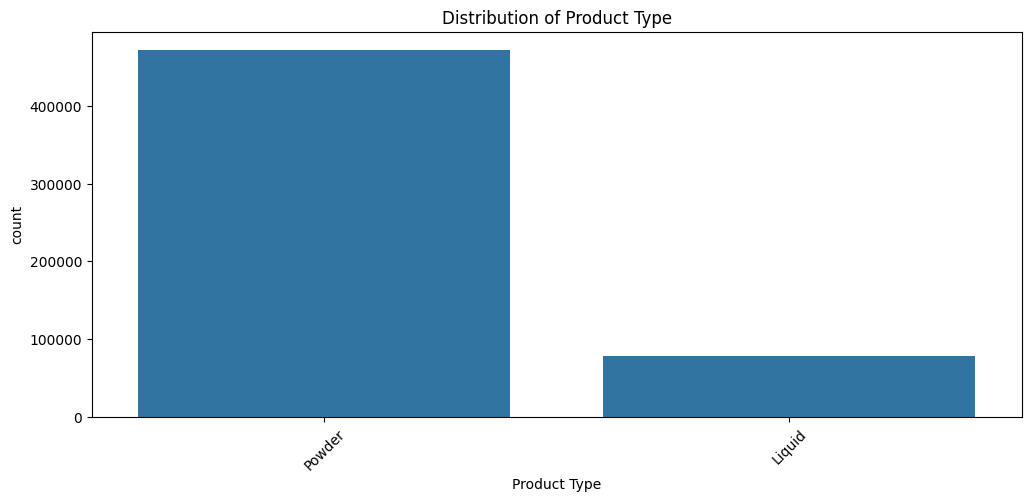

In [14]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(12, 5))
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


This Graph gives us a visual description of the count of each column

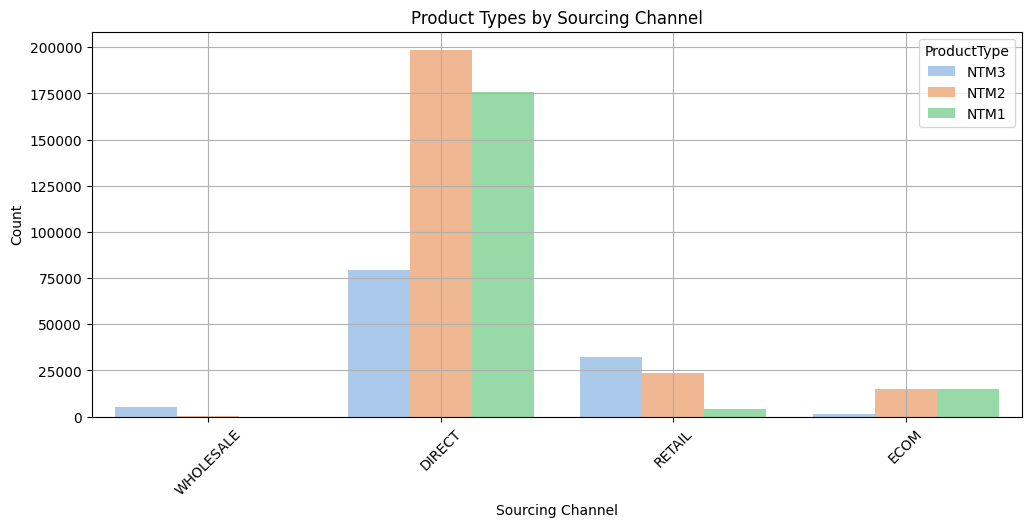

In [15]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Sourcing Channel', hue='ProductType', data=df, palette='pastel')
plt.xlabel('Sourcing Channel')
plt.ylabel('Count')
plt.title('Product Types by Sourcing Channel')
plt.xticks(rotation=45)
plt.legend(title='ProductType')
plt.grid(visible=True)

plt.show()


This graph shows that most of the sales are direct as compared to the other forms of sales, which are wholesale, retail and E com.

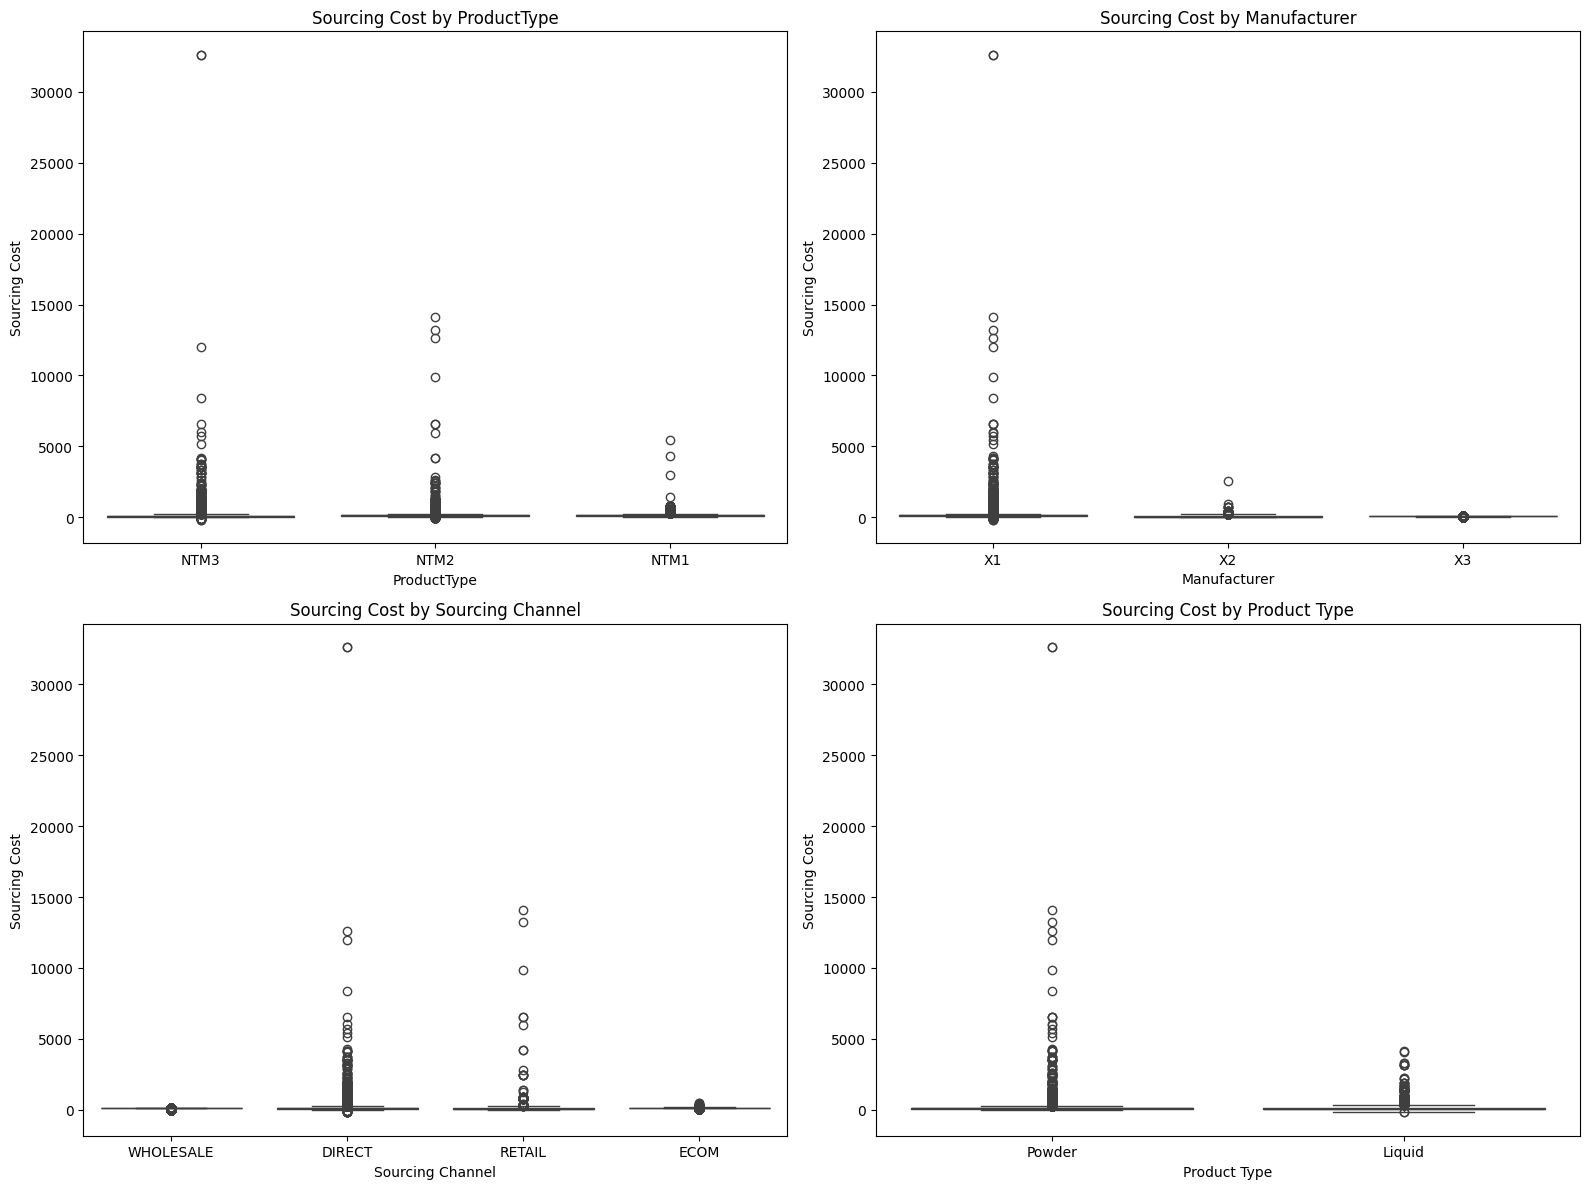

In [16]:
# Creating a copy of the training dataset to avoid modifying the original
train_plot_df = df.copy()

# Create boxplots
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.boxplot(x='ProductType', y='Sourcing Cost', data=train_plot_df)
plt.title('Sourcing Cost by ProductType')

plt.subplot(2, 2, 2)
sns.boxplot(x='Manufacturer', y='Sourcing Cost', data=train_plot_df)
plt.title('Sourcing Cost by Manufacturer')

plt.subplot(2, 2, 3)
sns.boxplot(x='Sourcing Channel', y='Sourcing Cost', data=train_plot_df)
plt.title('Sourcing Cost by Sourcing Channel')

plt.subplot(2, 2, 4)
sns.boxplot(x='Product Type', y='Sourcing Cost', data=train_plot_df)
plt.title('Sourcing Cost by Product Type')

plt.tight_layout()
plt.show()

creating various boxplots to visualize the values

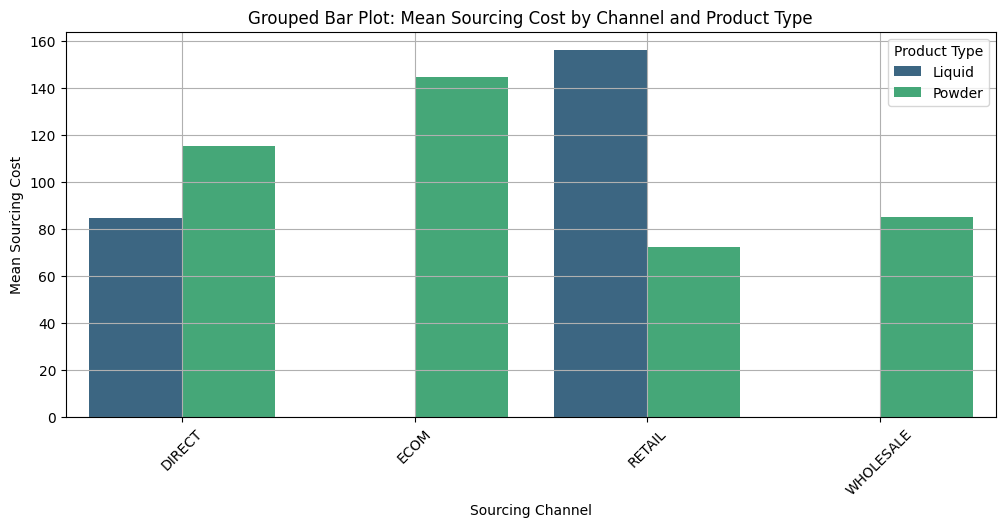

In [17]:
# Aggregate data to calculate mean sourcing cost by channel and product type
mean_cost = df.groupby(['Sourcing Channel', 'Product Type'])['Sourcing Cost'].mean().reset_index()

# Plot the grouped bar chart
plt.figure(figsize=(12, 5))
sns.barplot(x='Sourcing Channel', y='Sourcing Cost', hue='Product Type', data=mean_cost , palette='viridis')
plt.xlabel('Sourcing Channel')
plt.ylabel('Mean Sourcing Cost')
plt.title('Grouped Bar Plot: Mean Sourcing Cost by Channel and Product Type')
plt.xticks(rotation=45)
plt.legend(title='Product Type')
plt.grid(visible=True)

plt.show()

This graph gives us a very useful information which is the product type, powder is sold mostly on the Ecom platform and liquid is sold the highest through retail

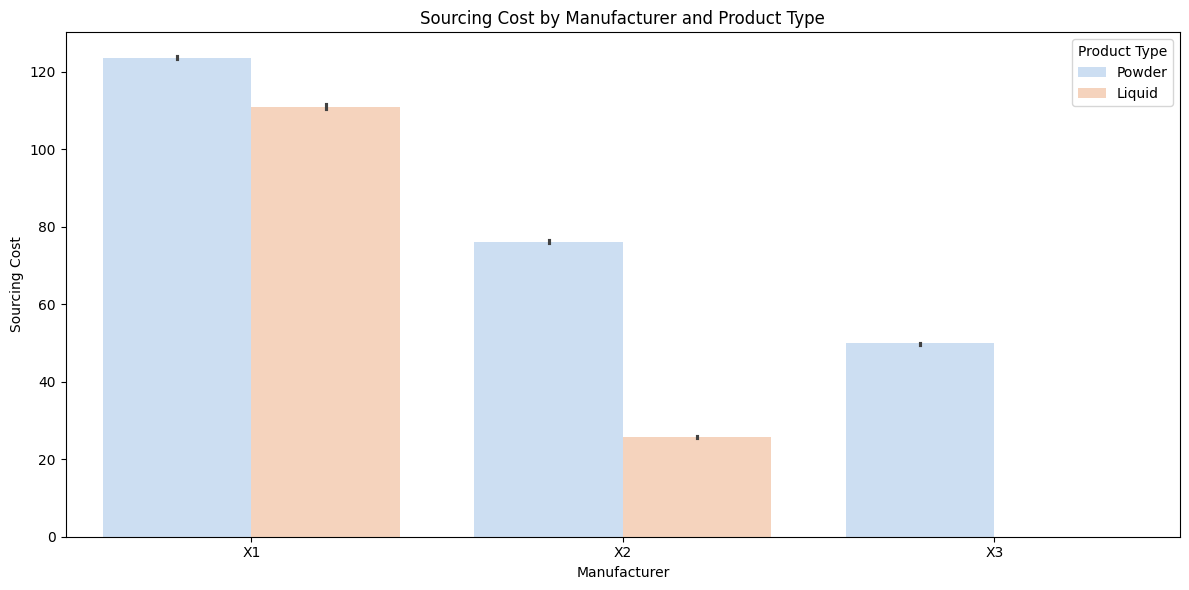

In [18]:
plt.figure(figsize=(12, 6))

# Create a scatter plot
sns.barplot(data=df, x='Manufacturer', y='Sourcing Cost', hue='Product Type', palette='pastel', alpha=0.6)

plt.title('Sourcing Cost by Manufacturer and Product Type')
plt.xlabel('Manufacturer')
plt.ylabel('Sourcing Cost')
plt.legend(title='Product Type')
plt.tight_layout()

plt.show()

This graph shows us that X1 manufacturer requires the most amount of funds as sourcing cost .

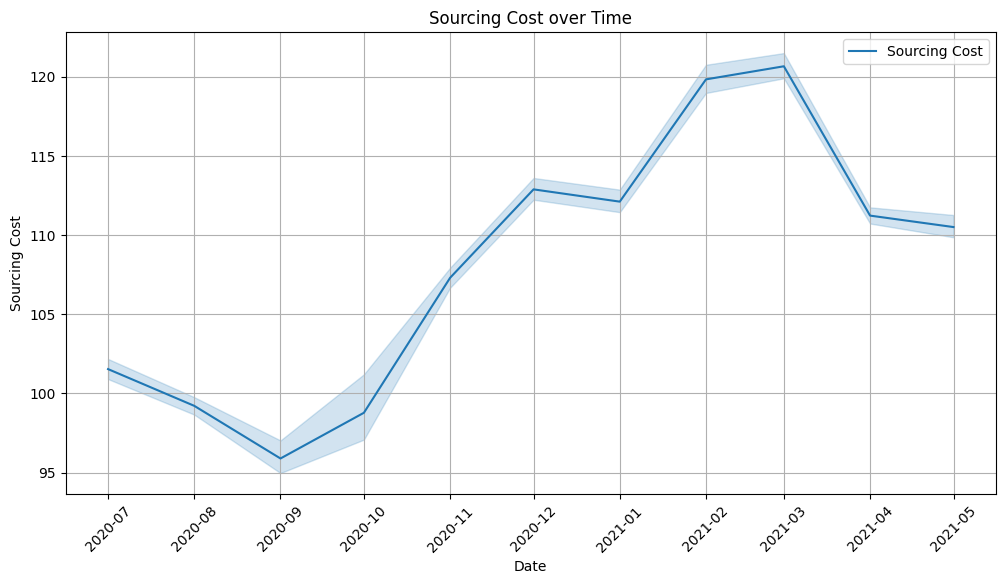

In [19]:
# Combine 'Year' and 'Month' into 'Month of Sourcing' datetime column
train_plot_df['Month of Sourcing'] = pd.to_datetime(train_plot_df['Year'].astype(str) + '-' + train_plot_df['Month'].astype(str))

# Set the 'Month of Sourcing' column as the index
train_plot_df.set_index('Month of Sourcing', inplace=True)

# Create a time series plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_plot_df['Sourcing Cost'], label='Sourcing Cost')
plt.title('Sourcing Cost over Time')
plt.xlabel('Date')
plt.ylabel('Sourcing Cost')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

This graph shows us the sourcing cost over a time period .

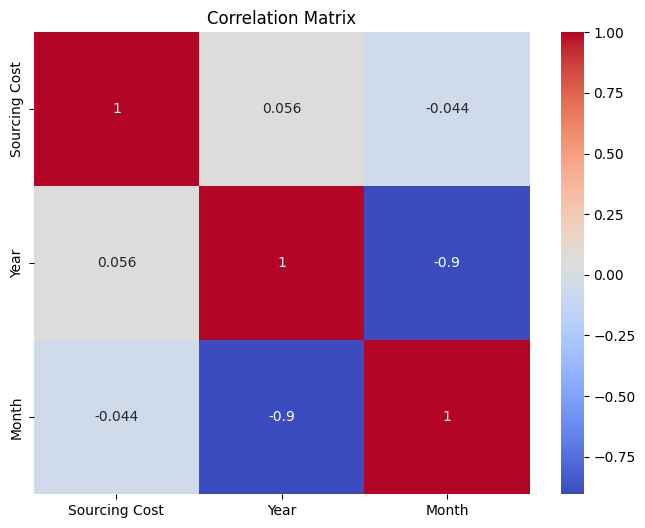

In [20]:
# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(train_plot_df[['Sourcing Cost', 'Year', 'Month', ]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

A correlation graph b/w 'Sourcing Cost', 'Year', 'Month'

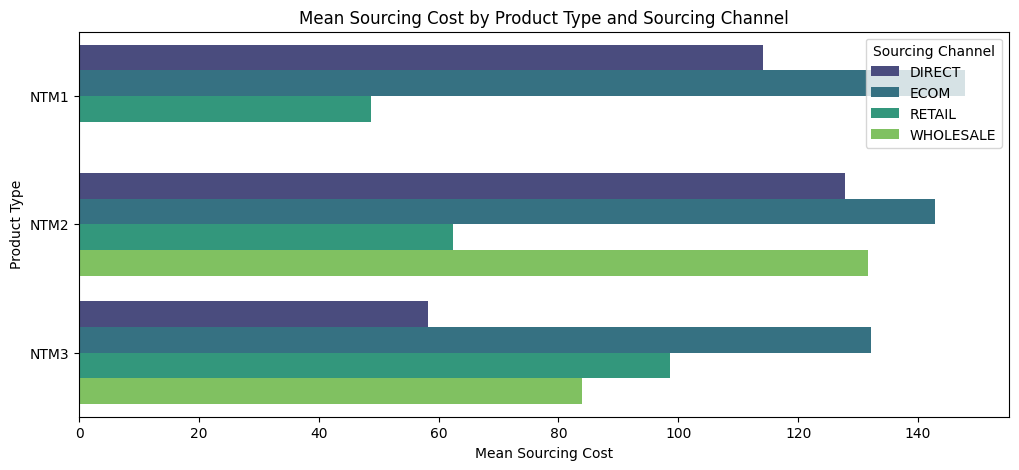

In [21]:
# Create a DataFrame with mean sourcing cost for each combination of 'Product Type' and 'Sourcing Channel'
mean_sourcing_cost_grouped = df.groupby(['ProductType', 'Sourcing Channel'])['Sourcing Cost'].mean().reset_index()

# Create a grouped horizontal bar plot using Seaborn
plt.figure(figsize=(12, 5))
sns.barplot(x='Sourcing Cost', y='ProductType', hue='Sourcing Channel', data=mean_sourcing_cost_grouped , palette = "viridis")
plt.xlabel('Mean Sourcing Cost')
plt.ylabel('Product Type')
plt.title('Mean Sourcing Cost by Product Type and Sourcing Channel')
plt.legend(title='Sourcing Channel')
plt.show()


This graph makes it easier to visualise which product requires the most sourcing cost

In [22]:
df.columns

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Sourcing Cost', 'Year', 'Month'],
      dtype='object')

<FONT COLOR = 'PURPLE '><H2>Adding Label Encoding to training dataset

In [23]:
# Unique values in the "ProductType" column
product_types = df['ProductType'].unique()
print("Unique values in the 'ProductType' column:")
print(product_types)

# Unique values in the "Manufacturer" column
manufacturers = df['Manufacturer'].unique()
print("Unique values in the 'Manufacturer' column:")
print(manufacturers)

# Unique values in the "Area Code" column
area_codes = df['Area Code'].unique()
print("Unique values in the 'Area Code' column:")
print(area_codes)

# Unique values in the "Product Size" column
product_sizes = df['Product Size'].unique()
print("Unique values in the 'Product Size' column:")
print(product_sizes)

# Unique values in the "Sourcing Channel" column
sourcing_channels = df['Sourcing Channel'].unique()
print("Unique values in the 'Sourcing Channel' column:")
print(sourcing_channels)

# Unique values in the "Product Type" column
product_types = df['Product Type'].unique()
print("Unique values in the 'Product Type' column:")
print(product_types)


Unique values in the 'ProductType' column:
['NTM3' 'NTM2' 'NTM1']
Unique values in the 'Manufacturer' column:
['X1' 'X2' 'X3']
Unique values in the 'Area Code' column:
['A28' 'A9' 'A20' 'A18' 'A10' 'A19' 'A29' 'A7' 'A2' 'A8' 'A4' 'A6' 'A30'
 'A35' 'A44' 'A45' 'A31' 'A25' 'A37' 'A32' 'A34' 'A46' 'A11' 'A39' 'A41'
 'A17' 'A38' 'A5' 'A22' 'A3' 'A12' 'A24' 'A36' 'A42' 'A14' 'A43' 'A33'
 'A15' 'A40' 'A21' 'A16' 'A13' 'A1' 'A23' 'A26']
Unique values in the 'Product Size' column:
['Large' 'Small' 'ExtraLarge']
Unique values in the 'Sourcing Channel' column:
['WHOLESALE' 'DIRECT' 'RETAIL' 'ECOM']
Unique values in the 'Product Type' column:
['Powder' 'Liquid']


In [24]:
# Select the categorical columns to be encoded
cat_cols = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']

# Create an instance of LabelEncoder for each column and fit it to the data
label_encoders = {}
for col in cat_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [25]:
# To see what labels have been encoded with which integer
for col in cat_cols:
    le = label_encoders[col]
    print(f"Column: {col}")
    for i, class_label in enumerate(le.classes_):
        print(f"Label {i}: {class_label}")
    print("\n")

Column: ProductType
Label 0: NTM1
Label 1: NTM2
Label 2: NTM3


Column: Manufacturer
Label 0: X1
Label 1: X2
Label 2: X3


Column: Area Code
Label 0: A1
Label 1: A10
Label 2: A11
Label 3: A12
Label 4: A13
Label 5: A14
Label 6: A15
Label 7: A16
Label 8: A17
Label 9: A18
Label 10: A19
Label 11: A2
Label 12: A20
Label 13: A21
Label 14: A22
Label 15: A23
Label 16: A24
Label 17: A25
Label 18: A26
Label 19: A28
Label 20: A29
Label 21: A3
Label 22: A30
Label 23: A31
Label 24: A32
Label 25: A33
Label 26: A34
Label 27: A35
Label 28: A36
Label 29: A37
Label 30: A38
Label 31: A39
Label 32: A4
Label 33: A40
Label 34: A41
Label 35: A42
Label 36: A43
Label 37: A44
Label 38: A45
Label 39: A46
Label 40: A5
Label 41: A6
Label 42: A7
Label 43: A8
Label 44: A9


Column: Sourcing Channel
Label 0: DIRECT
Label 1: ECOM
Label 2: RETAIL
Label 3: WHOLESALE


Column: Product Size
Label 0: ExtraLarge
Label 1: Large
Label 2: Small


Column: Product Type
Label 0: Liquid
Label 1: Powder




In [26]:
# Print the column names of the encoded data
print(df.columns)

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Sourcing Cost', 'Year', 'Month'],
      dtype='object')


In [27]:
# Checking the shape of df
df.shape

(550176, 9)

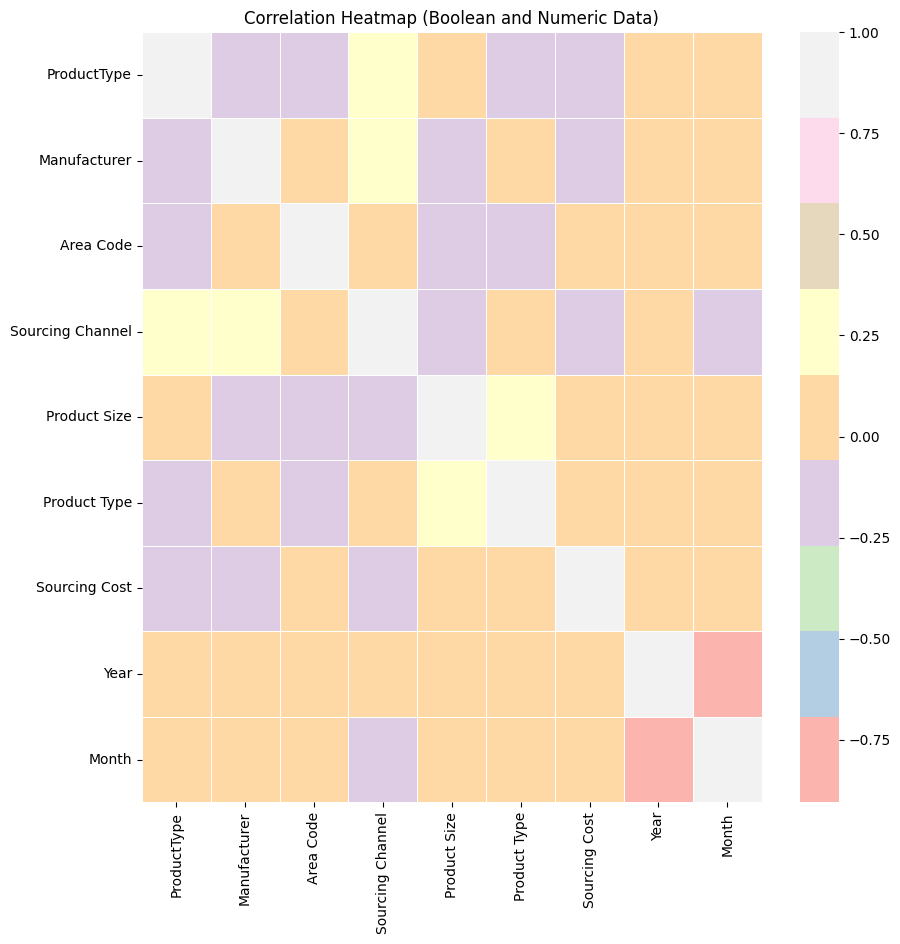

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure only numeric columns are selected (booleans are included as numbers)
numeric_df = df.select_dtypes(include=['number', 'bool'])

# Calculate the correlation matrix for boolean/numeric data
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=False, cmap='Pastel1', linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap (Boolean and Numeric Data)')
plt.show()


This heatmap shows weak correlations across most features, indicating minimal or no strong linear relationships. The diagonal line of perfect correlation (value of 1) shows each feature correlating perfectly with itself, but outside the diagonal, the correlations are mostly near zero.

<FONT COLOR = 'PURPLE '><H2>Importing the Testing Dataset

In [29]:
df_test = pd.read_excel("D:\AP\Testing Dataset.xlsx")

# Extract individual components
df_test['Year'] = df_test['Month of Sourcing'].dt.year
df_test['Month'] = df_test['Month of Sourcing'].dt.month

# Drop the 'Month of Sourcing' column using the correct syntax
df_test = df_test.drop(columns=['Month of Sourcing'])

# Print the column names of the data
print(df_test.columns)



Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Sourcing Cost', 'Year', 'Month'],
      dtype='object')


<FONT COLOR = 'PURPLE '><H2>Applying Label Encoding to the Test Dataset

In [30]:
# Select the categorical columns to be encoded
cat_cols = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']

# Create an instance of LabelEncoder for each column and fit it to the data
label_encoders = {}
for col in cat_cols:
    label_encoders[col] = LabelEncoder()
    df_test[col] = label_encoders[col].fit_transform(df_test[col])

# To see what labels have been encoded with which integer
for col in cat_cols:
    le = label_encoders[col]
    print(f"Column: {col}")
    for i, class_label in enumerate(le.classes_):
        print(f"Label {i}: {class_label}")
    print("\n")

df_test.head()

Column: ProductType
Label 0: NTM1
Label 1: NTM2
Label 2: NTM3


Column: Manufacturer
Label 0: X1
Label 1: X2
Label 2: X3


Column: Area Code
Label 0: A1
Label 1: A10
Label 2: A11
Label 3: A12
Label 4: A13
Label 5: A14
Label 6: A15
Label 7: A16
Label 8: A17
Label 9: A18
Label 10: A19
Label 11: A2
Label 12: A20
Label 13: A21
Label 14: A22
Label 15: A23
Label 16: A24
Label 17: A25
Label 18: A26
Label 19: A28
Label 20: A29
Label 21: A3
Label 22: A30
Label 23: A31
Label 24: A32
Label 25: A33
Label 26: A34
Label 27: A35
Label 28: A36
Label 29: A37
Label 30: A38
Label 31: A39
Label 32: A4
Label 33: A40
Label 34: A41
Label 35: A42
Label 36: A43
Label 37: A44
Label 38: A45
Label 39: A46
Label 40: A5
Label 41: A6
Label 42: A7
Label 43: A8
Label 44: A9


Column: Sourcing Channel
Label 0: DIRECT
Label 1: ECOM
Label 2: RETAIL
Label 3: WHOLESALE


Column: Product Size
Label 0: ExtraLarge
Label 1: Large
Label 2: Small


Column: Product Type
Label 0: Liquid
Label 1: Powder




,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost,Year,Month
0,0,0,0,0,2,1,103.68,2021,6
1,0,0,1,0,1,1,155.75,2021,6
2,0,0,1,1,1,1,143.02,2021,6
3,0,0,2,0,1,1,139.39,2021,6
4,0,0,11,0,1,1,169.42,2021,6


In [31]:
df.columns

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Sourcing Cost', 'Year', 'Month'],
      dtype='object')

In [32]:
df_test.columns

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Sourcing Cost', 'Year', 'Month'],
      dtype='object')

<FONT COLOR = 'PURPLE '><H2>Splitting the Dataset into Features and Target

In [33]:
# Split the training data into features and target
X_train = df.drop(columns=['Sourcing Cost'])
y_train = df['Sourcing Cost']

X_test = df_test.drop(columns=['Sourcing Cost'])
y_test = df_test['Sourcing Cost']

<FONT COLOR = 'purple'><H1>Linear Regression model


In [34]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Display DataFrame for Model Metrics
print("\nLinear Regression Results:")
metrics_df = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'R-squared'],
    'Value': [mse, mae, r2]
})
# Display the DataFrame
display(metrics_df)

# Display Actual vs Predicted Values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
# Print the DataFrame for further analysis
print("\nActual vs Predicted values on the test dataset:")
display(results_df)


Linear Regression Results:


,Metric,Value
0,Mean Squared Error,2313.692008
1,Mean Absolute Error,37.277854
2,R-squared,0.147170



Actual vs Predicted values on the test dataset:


,Actual,Predicted
0,103.68,135.639512
1,155.75,143.081888
2,143.02,149.365586
3,139.39,143.659899
4,169.42,148.862000
...,...,...
91,89.57,89.136353
92,114.57,120.293643
93,111.26,113.429278
94,32.32,43.488170


Linear Regression Results Graph:


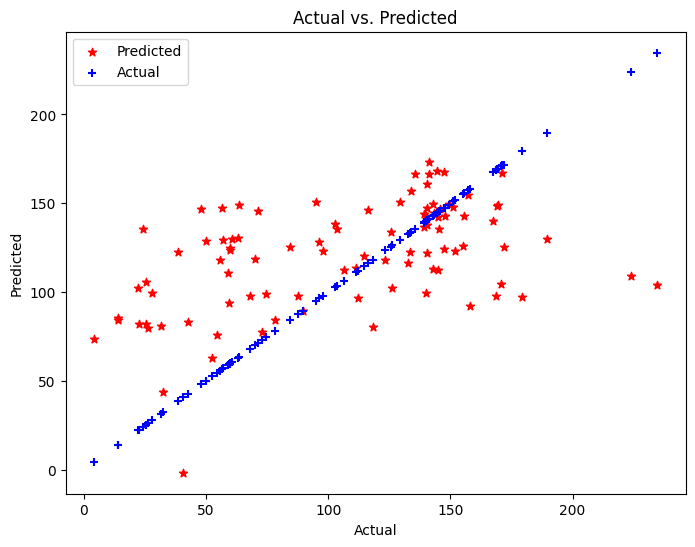

In [35]:
print("Linear Regression Results Graph:")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, marker='*', color='red', label='Predicted')
plt.scatter(y_test, y_test, marker='+', color='blue', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

#### Linear Regression Results:
- **Mean Squared Error**: 2313.69
- **Mean Absolute Error**: 37.28
- **R-squared**: 0.147

**Analysis**: Linear Regression shows relatively high error rates and a low R-squared, suggesting that the model captures only a small fraction of the variance in the data. This might indicate that the relationship between the predictors and the target variable is non-linear, or crucial variables or interactions are missing.


<FONT COLOR = 'purple'><H1>Lasso Regression model

In [36]:
# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate Lasso regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print results for Lasso regression
print("\nLasso Regression Results:")
print(f"Mean Squared Error: {mse_lasso}")
print(f"Mean Absolute Error: {mae_lasso}")
print(f"R-squared: {r2_lasso}")

#Display DataFrame for Model Metrics
print("\nLasso Regression Results:")
metrics_df = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'R-squared'],
    'Value': [mse_lasso, mae_lasso, r2_lasso]
})
# Display the DataFrame
display(metrics_df)

# Display Actual vs Predicted Values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_lasso
})
# Print the DataFrame for further analysis
print("\nActual vs Predicted values on the test dataset:")
display(results_df)


Lasso Regression Results:
Mean Squared Error: 2309.884326662985
Mean Absolute Error: 37.244230790364014
R-squared: 0.14857353144059948

Lasso Regression Results:


,Metric,Value
0,Mean Squared Error,2309.884327
1,Mean Absolute Error,37.244231
2,R-squared,0.148574



Actual vs Predicted values on the test dataset:


,Actual,Predicted
0,103.68,135.512829
1,155.75,142.906157
2,143.02,149.161671
3,139.39,143.484274
4,169.42,148.687320
...,...,...
91,89.57,89.152455
92,114.57,120.175002
93,111.26,113.359790
94,32.32,43.435468


Lasso Regression Results Graph:


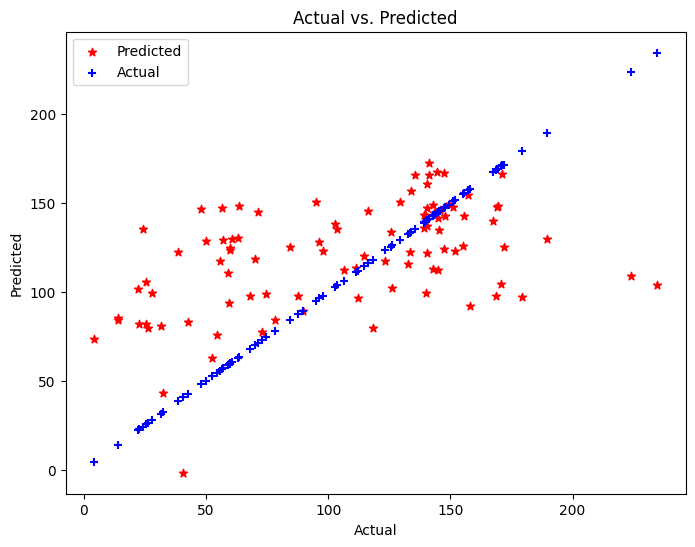

In [37]:
print("Lasso Regression Results Graph:")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, marker='*', color='red', label='Predicted')
plt.scatter(y_test, y_test, marker='+', color='blue', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

#### Lasso Regression Results:
- **Mean Squared Error**: 2389.88
- **Mean Absolute Error**: 37.24
- **R-squared**: 0.149

**Analysis**: Lasso Regression, incorporating L1 regularization, shows a slight decrease in performance compared to Linear Regression. The similar R-squared value suggests that penalizing the coefficients for feature selection does not significantly impact the model's ability to capture variance, indicating sparse features do not heavily influence the model.


<FONT COLOR = 'purple'><H1>Ridge Regression model

In [38]:
# Ridge Regression
print("Ridge Regression Training and Results:")
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate Ridge regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Display DataFrame for Ridge Regression Metrics
ridge_metrics_df = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'R-squared'],
    'Value': [mse_ridge, mae_ridge, r2_ridge]
})
display(ridge_metrics_df)

# Display Actual vs Predicted Values for Ridge Regression
results_df_ridge = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_ridge
})
print("\nActual vs Predicted values for Ridge Regression:")
display(results_df_ridge)


Ridge Regression Training and Results:


,Metric,Value
0,Mean Squared Error,2313.680853
1,Mean Absolute Error,37.277769
2,R-squared,0.147174



Actual vs Predicted values for Ridge Regression:


,Actual,Predicted
0,103.68,135.639030
1,155.75,143.081293
2,143.02,149.364848
3,139.39,143.659304
4,169.42,148.861405
...,...,...
91,89.57,89.136483
92,114.57,120.293362
93,111.26,113.429111
94,32.32,43.488474


Ridge Regression Results Graph:


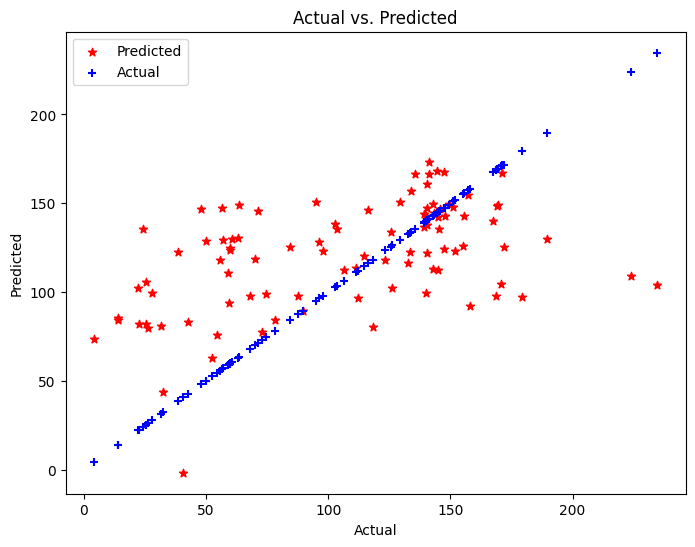

In [39]:
print("Ridge Regression Results Graph:")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, marker='*', color='red', label='Predicted')
plt.scatter(y_test, y_test, marker='+', color='blue', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

#### Ridge Regression Results:
- **Mean Squared Error**: 2313.68
- **Mean Absolute Error**: 37.28
- **R-squared**: 0.147

**Analysis**: Ridge Regression, using L2 regularization, displays nearly identical performance to Linear Regression, suggesting that issues with multicollinearity and feature scaling are not significantly affecting the model's predictions.


<FONT COLOR = 'purple'><H1>Gradient Boosting model

In [42]:
# Gradient Boosting
print("Gradient Boosting Regression Training and Results:")
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# Evaluate Gradient Boosting
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

# Display DataFrame for Gradient Boosting Regression Metrics
gbr_metrics_df = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'R-squared'],
    'Value': [mse_gbr, mae_gbr, r2_gbr]
})
display(gbr_metrics_df)

# Display Actual vs Predicted Values for Gradient Boosting Regression
results_df_gbr = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_gbr
})
print("\nActual vs Predicted values for Gradient Boosting Regression:")
display(results_df_gbr)

Gradient Boosting Regression Training and Results:


,Metric,Value
0,Mean Squared Error,1364.902020
1,Mean Absolute Error,24.037411
2,R-squared,0.496895



Actual vs Predicted values for Gradient Boosting Regression:


,Actual,Predicted
0,103.68,109.348789
1,155.75,147.392127
2,143.02,147.392127
3,139.39,147.392127
4,169.42,160.437226
...,...,...
91,89.57,68.717257
92,114.57,108.728107
93,111.26,95.301436
94,32.32,67.859288


Gradient Boosting Results Graph:


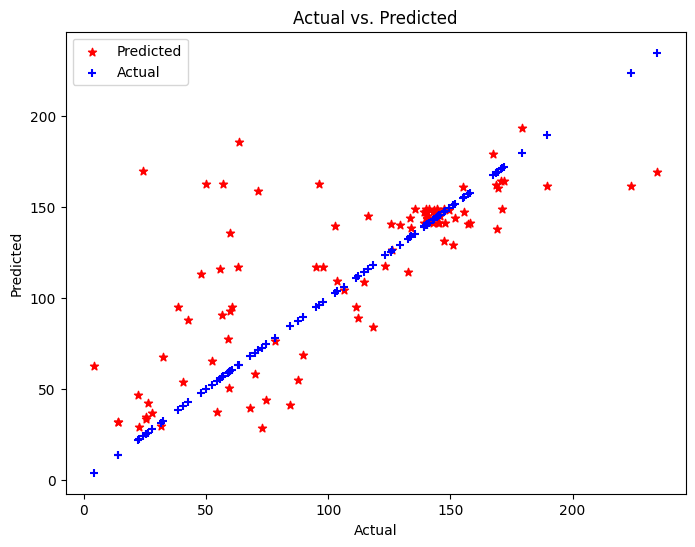

In [43]:
print("Gradient Boosting Results Graph:")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gbr, marker='*', color='red', label='Predicted')
plt.scatter(y_test, y_test, marker='+', color='blue', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

#### Gradient Boosting Regression Results:
- **Mean Squared Error**: 1364.90
- **Mean Absolute Error**: 24.04
- **R-squared**: 0.497

**Analysis**: Gradient Boosting offers a balance between bias and variance, improving upon linear models by better handling non-linearity. Its performance suggests it effectively captures complex patterns in the data, though not as robustly as Random Forest.


<FONT COLOR = 'purple'><H1>K-Nearest Neighbors Model

In [44]:
# K-Nearest Neighbors (KNN)
print("K-Nearest Neighbors (KNN) Regression Training and Results:")
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Display DataFrame for KNN Regression Metrics
knn_metrics_df = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'R-squared'],
    'Value': [mse_knn, mae_knn, r2_knn]
})
display(knn_metrics_df)

# Display Actual vs Predicted Values for KNN Regression
results_df_knn = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_knn
})
print("\nActual vs Predicted values for K-Nearest Neighbors (KNN) Regression:")
display(results_df_knn)

K-Nearest Neighbors (KNN) Regression Training and Results:


,Metric,Value
0,Mean Squared Error,1191.055992
1,Mean Absolute Error,18.555754
2,R-squared,0.560975



Actual vs Predicted values for K-Nearest Neighbors (KNN) Regression:


,Actual,Predicted
0,103.68,114.7500
1,155.75,154.1518
2,143.02,149.7628
3,139.39,139.9922
4,169.42,172.3496
...,...,...
91,89.57,25.0084
92,114.57,122.6194
93,111.26,98.1890
94,32.32,6.5044


K-Nearest Neighbours Results Graph:


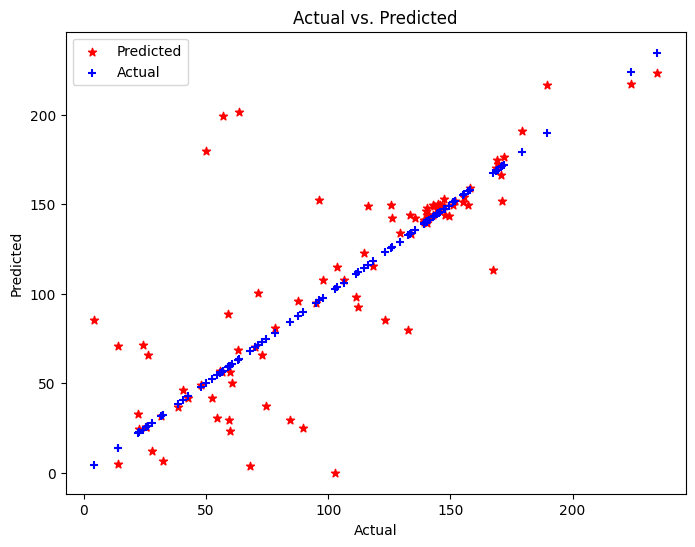

In [45]:
print("K-Nearest Neighbours Results Graph:")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, marker='*', color='red', label='Predicted')
plt.scatter(y_test, y_test, marker='+', color='blue', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

#### K-Nearest Neighbors (KNN) Regression Results:
- **Mean Squared Error**: 1191.06
- **Mean Absolute Error**: 18.56
- **R-squared**: 0.561

**Analysis**: KNN performs well compared to linear models, indicating that local similarities and distances between observations are significant predictors of the target variable. However, its higher error rates compared to ensemble methods suggest limitations in its ability to generalize across broader data variances.


<FONT COLOR = 'purple'><H1>Decision Tree model

In [46]:
# Decision Trees
print("Decision Trees Regression Training and Results:")
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluate Decision Trees
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Display DataFrame for Decision Tree Regression Metrics
dt_metrics_df = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'R-squared'],
    'Value': [mse_dt, mae_dt, r2_dt]
})
display(dt_metrics_df)

# Display Actual vs Predicted Values for Decision Tree Regression
results_df_dt = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_dt
})
print("\nActual vs Predicted values for Decision Trees Regression:")
display(results_df_dt)

Decision Trees Regression Training and Results:


,Metric,Value
0,Mean Squared Error,1460.841444
1,Mean Absolute Error,26.649979
2,R-squared,0.461532



Actual vs Predicted values for Decision Trees Regression:


,Actual,Predicted
0,103.68,124.464832
1,155.75,145.219787
2,143.02,145.219787
3,139.39,145.219787
4,169.42,145.219787
...,...,...
91,89.57,78.251807
92,114.57,128.460102
93,111.26,78.251807
94,32.32,55.474567


Decision Tree Results Graph:


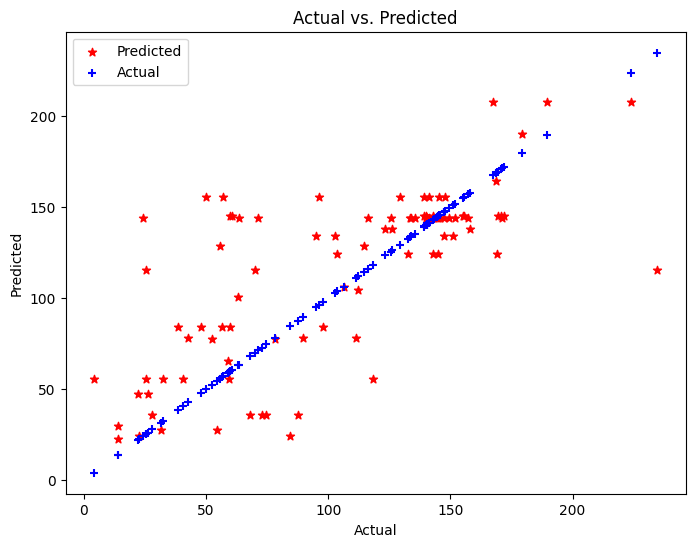

In [47]:
print("Decision Tree Results Graph:")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, marker='*', color='red', label='Predicted')
plt.scatter(y_test, y_test, marker='+', color='blue', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

#### Decision Trees Regression Results:
- **Mean Squared Error**: 1460.84
- **Mean Absolute Error**: 26.65
- **R-squared**: 0.462

**Analysis**: The Decision Tree model provides moderate accuracy. It captures non-linear relationships better than linear models but is prone to overfitting, especially without proper parameter tuning and pruning.


<FONT COLOR = 'purple'><H1>Light LGBM Regression model

In [48]:
# LightGBM
print("LightLGBM Regression Training and Results:")
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

# Evaluate LightGBM
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

# Display DataFrame for LightGBM Regression Metrics
lgbm_metrics_df = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'R-squared'],
    'Value': [mse_lgbm, mae_lgbm, r2_lgbm]
})
display(lgbm_metrics_df)

# Display Actual vs Predicted Values for LightGBM Regression
results_df_lgbm = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_lgbm
})
print("\nActual vs Predicted values for LightGBM Regression:")
display(results_df_lgbm)


LightLGBM Regression Training and Results:
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.201029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 75
[LightGBM] [Info] Number of data points in the train set: 550176, number of used features: 8
[LightGBM] [Info] Start training from score 108.816793


,Metric,Value
0,Mean Squared Error,1013.802225
1,Mean Absolute Error,16.686994
2,R-squared,0.626311



Actual vs Predicted values for LightGBM Regression:


,Actual,Predicted
0,103.68,109.961381
1,155.75,150.642317
2,143.02,149.530930
3,139.39,146.101957
4,169.42,166.847140
...,...,...
91,89.57,68.858598
92,114.57,121.544351
93,111.26,99.596514
94,32.32,40.850749


LightGBM Results Graph:


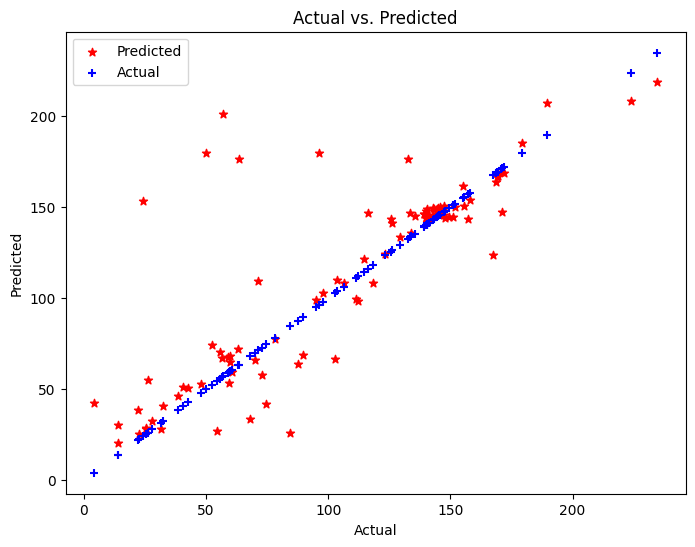

In [49]:
print("LightGBM Results Graph:")
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lgbm, marker='*', color='red', label='Predicted')
plt.scatter(y_test, y_test, marker='+', color='blue', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

#### LightGBM Regression Results:
- **Mean Squared Error**: 1013.80
- **Mean Absolute Error**: 16.69
- **R-squared**: 0.626

**Analysis**: LightGBM offers strong performance with a high R-squared value, indicating effective handling of the dataset with gradient boosting techniques. Its efficiency and speed make it suitable for large datasets.


<FONT COLOR = 'purple'><H1>XGBoost Regression model<br>

In [52]:
# XGBoost
print("XGBoost Regression Training and Results:")
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluate XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Display DataFrame for XGBoost Regression Metrics
xgb_metrics_df = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'R-squared'],
    'Value': [mse_xgb, mae_xgb, r2_xgb]
})
display(xgb_metrics_df)

# Display Actual vs Predicted Values for XGBoost Regression
results_df_xgb = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_xgb
})
print("\nActual vs Predicted values for XGBoost Regression:")
display(results_df_xgb)

XGBoost Regression Training and Results:


,Metric,Value
0,Mean Squared Error,1089.211679
1,Mean Absolute Error,16.785097
2,R-squared,0.598515



Actual vs Predicted values for XGBoost Regression:


,Actual,Predicted
0,103.68,113.652794
1,155.75,153.879700
2,143.02,153.118317
3,139.39,145.518753
4,169.42,169.150772
...,...,...
91,89.57,73.966988
92,114.57,119.562332
93,111.26,98.053467
94,32.32,41.645172


XGBoost Results Graph:


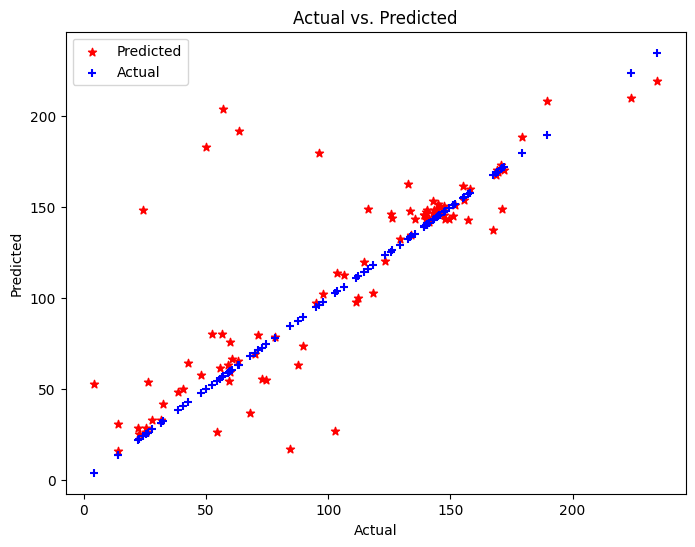

In [53]:
print("XGBoost Results Graph:")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, marker='*', color='red', label='Predicted')
plt.scatter(y_test, y_test, marker='+', color='blue', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

#### XGBoost Regression Results:
- **Mean Squared Error**: 1089.22
- **Mean Absolute Error**: 16.79
- **R-squared**: 0.598

**Analysis**: Similar to LightGBM, XGBoost shows excellent predictive performance and handles complex datasets well, benefiting from both row and column sampling to improve accuracy and prevent overfitting.


<FONT COLOR = 'purple'><H1>Ensemble with Bagging


In [50]:
# Base model (Random Forest)
base_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Ensemble with Bagging
print("Ensemble with Bagging Training and Results:")
bagging = BaggingRegressor(base_estimator=base_model, n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)

# Evaluate Bagging
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
mae_bagging = mean_absolute_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)

# Display DataFrame for Bagging Ensemble Metrics
bagging_metrics_df = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'R-squared'],
    'Value': [mse_bagging, mae_bagging, r2_bagging]
})
display(bagging_metrics_df)

# Display Actual vs Predicted Values for Bagging Ensemble
results_df_bagging = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_bagging
})
print("\nActual vs Predicted values for Ensemble with Bagging:")
display(results_df_bagging)

Ensemble with Bagging Training and Results:


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


,Metric,Value
0,Mean Squared Error,1069.431629
1,Mean Absolute Error,16.547317
2,R-squared,0.605806



Actual vs Predicted values for Ensemble with Bagging:


,Actual,Predicted
0,103.68,113.451905
1,155.75,154.181079
2,143.02,149.623023
3,139.39,145.401011
4,169.42,170.906846
...,...,...
91,89.57,79.081740
92,114.57,120.476970
93,111.26,100.988988
94,32.32,8.084058


BaggingRegressor Results Graph:


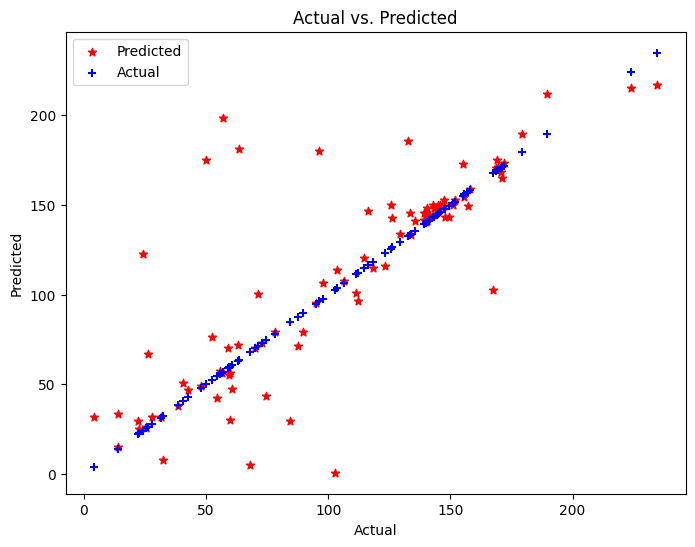

In [51]:
print("BaggingRegressor Results Graph:")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_bagging, marker='*', color='red', label='Predicted')
plt.scatter(y_test, y_test, marker='+', color='blue', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

#### Ensemble with Bagging Regression Results:
- **Mean Squared Error**: 1069.43
- **Mean Absolute Error**: 16.54
- **R-squared**: 0.606

**Analysis**: The Bagging ensemble technique, using Random Forest as the base model, nearly mirrors the performance of the standalone Random Forest, suggesting that further diversity in the model ensemble might be necessary to achieve significant improvements.


<FONT COLOR = 'purple'><H1>Random Forest Regression model

In [40]:
#Random Forest
print("Random Forest Regression Training and Results:")
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display DataFrame for Random Forest Regression Metrics
rf_metrics_df = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'R-squared'],
    'Value': [mse_rf, mae_rf, r2_rf]
})
display(rf_metrics_df)

# Display Actual vs Predicted Values for Random Forest Regression
results_df_rf = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_rf
})
print("\nActual vs Predicted values for Random Forest Regression:")
display(results_df_rf)

Random Forest Regression Training and Results:


,Metric,Value
0,Mean Squared Error,1064.692243
1,Mean Absolute Error,16.521246
2,R-squared,0.607553



Actual vs Predicted values for Random Forest Regression:


,Actual,Predicted
0,103.68,113.537276
1,155.75,154.184253
2,143.02,149.623320
3,139.39,145.516934
4,169.42,171.035048
...,...,...
91,89.57,80.182518
92,114.57,120.991465
93,111.26,101.261220
94,32.32,8.026070


Random Forest Results Graph:


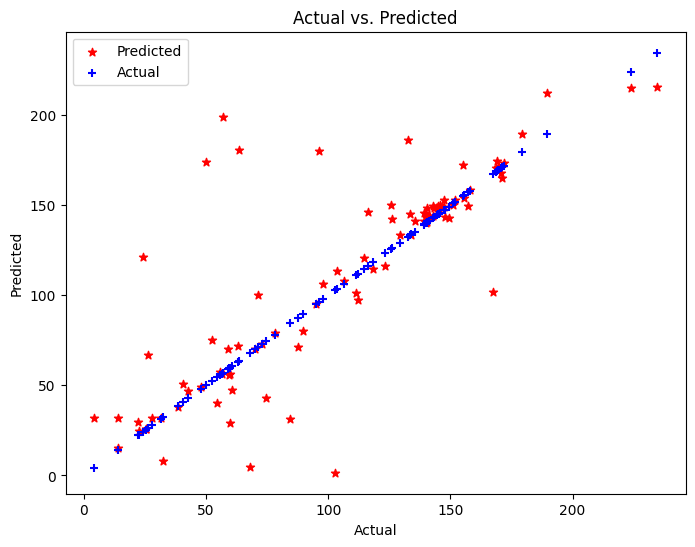

In [41]:
print("Random Forest Results Graph:")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, marker='*', color='red', label='Predicted')
plt.scatter(y_test, y_test, marker='+', color='blue', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()


#### Random Forest Regression Results:
- **Mean Squared Error**: 1064.69
- **Mean Absolute Error**: 16.52
- **R-squared**: 0.608
<BR>
<p> This is the selected Model as it is giving the best results

**Analysis**: Random Forest shows a substantial improvement over the linear models, indicating that it captures the non-linear relationships and interactions between features effectively. The increase in R-squared demonstrates a more accurate model for prediction, highlighting the effectiveness of ensemble methods in managing complex datasets.


## Final Approach: Random Forest Regression

After evaluating various regression models including Linear, Lasso, Ridge, KNN, Decision Trees, Gradient Boosting, LightGBM, XGBoost, and Ensemble techniques like Bagging with a RandomForest base model, the **Random Forest Regression** emerged as the final choice. Here's why:

### Performance Metrics Comparison:
Random Forest Regression demonstrated superior performance across all key metrics:
- **Mean Squared Error (MSE)**: `1064.69` — the lowest among all models, indicating minimal average squared differences between predicted and actual values.
- **Mean Absolute Error (MAE)**: `16.52` — the smallest value, reflecting the closest predictions to actual outcomes on average.
- **R-squared**: `0.608` — significantly higher than those of linear models and most other non-linear models, suggesting that Random Forest explains over 60% of the variance in the target variable, compared to the next best models.

### Model Characteristics:
- **Handling Non-Linearity**: Unlike linear models, Random Forest can handle non-linear relationships between features and the target, which is evident in our dataset.
- **Feature Interaction**: It effectively captures complex interactions between features without the need for explicit feature engineering.
- **Robustness to Overfitting**: Thanks to its ensemble nature, combining multiple decision trees helps reduce the risk of overfitting, making it robust in diverse data conditions.
- **Importance of Feature Selection**: Random Forest provides intrinsic feature selection, offering insights into which features most significantly impact the target variable, thus adding interpretative value to the model.

### Practical Considerations:
- **Scalability**: Random Forest scales relatively well to larger datasets.
- **Ease of Implementation**: With libraries like Scikit-learn, implementing Random Forest is straightforward and allows for extensive customization.
- **Interpretability**: Despite being a "black-box" model to some extent, the ability to rank features by importance aids in understanding model decisions, which is beneficial for stakeholder presentations and strategic decision-making.

### Conclusion:
Given its robust performance, ease of use, and the ability to deliver insights into the data, Random Forest was selected as the optimal model for my regression analysis. .
